In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as Cosmology
from astropy import units as u 
from astropy import constants as const 
import pandas as pd
from scipy.optimize import curve_fit
from astropy.cosmology import Planck13, Planck15, Planck18, z_at_value
import math
from ipynb.fs.full.DataframeGOALS import *
from ipynb.fs.full.xi import *


,Name,RA,Dec,Redshift,D_L [Mpc],log(LIR),log(LIR_unc),AGNbol,AGNbol_unc,SFR [M$_{\odot}$],SFR_unc [M$_{\odot}$],un-corr SFR [M$_{\odot}$],Supernova rate [yr$^{-1}$],un-corr Supernova rate [yr$^{-1}$],Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$],Flux(TeV) no AGN [GeV cm$^{-2}$ s$^{-1}$],SigmaIR (x 10$^{10}$ ),R_70 (kpc)
0,NGC0023,00h09m53.32s,+25d55m26.2s,0.01523,65.2,11.11,9.71,0.09,0.04,22.30,7.17,24.50,0.243594,0.267686,6.260177e-12,6.879315e-12,2.048,1.000564
1,NGC0034a,00h11m06.59s,-12d06m25.5s,0.01962,84.1,11.50,9.90,0.04,0.02,57.74,18.47,60.15,0.630807,0.657091,9.743605e-12,1.014959e-11,79.180,0.252117
2,MCG-02-01-051a,00h18m50.87s,-10d22m36.6s,0.02722,117.5,11.67,9.94,0.07,0.05,82.41,26.47,88.61,0.903875,0.971909,7.152331e-12,7.690679e-12,9.730,0.874689
3,ESO350-IG038,00h36m52.20s,-33d33m20.8s,0.02060,89.0,11.28,9.97,0.23,0.09,27.53,9.07,35.76,0.304871,0.395936,4.204856e-12,5.460852e-12,7.641,0.629992
4,NGC0232a,00h42m45.80s,-23d33m42.0s,0.02217,95.2,11.48,10.48,0.09,0.03,51.55,16.82,56.65,0.571041,0.627517,6.883478e-12,7.564261e-12,10.697,0.670315
5,NGC0232b,00h42m52.78s,-23d32m28.9s,0.02217,95.2,10.64,9.71,0.47,0.06,4.33,1.45,8.16,0.048073,0.090704,5.794853e-13,1.093368e-12,NaN,NaN
6,MCG+12-02-001,00h54m03.48s,+73d05m03.8s,0.01570,69.8,11.49,9.76,0.06,0.04,54.51,17.47,57.99,0.603606,0.642134,1.353497e-11,1.439891e-11,10.264,0.692232
7,NGC0317B,00h57m40.41s,+43d47m32.9s,0.01811,77.8,11.23,9.59,0.05,0.02,30.47,9.74,32.08,0.335235,0.352879,6.050689e-12,6.369146e-12,24.822,0.329983
8,IC1623AB,01h07m47.49s,-17d30m27.1s,0.02007,85.5,11.73,9.95,0.12,0.04,89.43,28.68,101.63,0.981993,1.115901,1.467543e-11,1.667663e-11,7.663,1.056114
9,MCG-03-04-014,01h10m08.98s,-16d51m09.7s,0.03349,144.0,11.62,10.02,0.07,0.04,73.03,23.42,78.53,0.805580,0.866215,4.244225e-12,4.563683e-12,3.390,1.398976


<Figure size 720x648 with 0 Axes>

# Completeness RBGS (U)LIRGs

In [2]:
SolLum = 3.82e26
Mpc_to_m =1e6*(u.pc).to(u.m)
def func(x,a,b):
    return a*x+b

A representative sample of the local LIRG population is found by determining the redshift up to which
the least luminous LIRG, i.e. L$_{\mathrm{IR}} = 10^{11} L_{\odot}$, can be observed, given the RBGS sensitivity $f_{60}$ = 5.24 Jy. To compute this redshift, the observed correlation between $f_{60}$ and the total IR flux $F_{\mathrm{IR}} = L_{\mathrm{IR}} / 4 \pi D^2_L $ of the RBGS LIRGs is fitted.


To determine $F_{\mathrm{IR}}$ that corresponds with $f_{60} = 5.24$ Jy, we perform a log-linear fit on the $f_{60}$ and $F_{\mathrm{IR}}$ catalog data of the form 

$\log_{10}\left(\frac{f_{60}}{\mathrm{Jy}}\right) = a \log_{10}\left(\frac{F_{\mathrm{IR}}}{\mathrm{W m^{-2}}}\right) + b$

In [7]:
RBGS_LIRGs_cz = np.loadtxt("RBGS/cz.txt")/(const.c.value/1000) 
lumdist= np.array(Cosmology.Planck18.luminosity_distance(RBGS_LIRGs_cz))
RBGS_LIRGs = np.loadtxt("RBGS/RBGS_LIRGs.txt")
RBGS_U_LIRGs = np.loadtxt("RBGS/RBGS_U_LIRGs.txt")
total_RBGS = np.loadtxt("totalrbgs.txt")

distances = np.array([i[2]*Mpc_to_m for i in RBGS_LIRGs])
distances_all = np.array([i[2]*Mpc_to_m for i in RBGS_U_LIRGs])
distances_cz_P18 = np.array(Cosmology.Planck18.luminosity_distance(RBGS_LIRGs_cz))*Mpc_to_m
f60 = np.array([i[0] for i in RBGS_LIRGs])


luminosity = np.array([pow(10,i[3])*SolLum for i in RBGS_LIRGs])
luminosity_all = np.array([pow(10,i[3])*SolLum for i in RBGS_U_LIRGs])

FIR = luminosity/(4*np.pi*pow(distances,2))
FIR_P18 = luminosity/(4*np.pi*pow(distances_cz_P18,2))


popt, pcov = curve_fit(func, np.log10(FIR) ,np.log10(f60))
popt_P18,pcov_P18 =  curve_fit(func, np.log10(FIR_P18) ,np.log10(f60))



!! The distances provided in the RBGS paper are proper distances !! 
!! No uncertainties were given to the fit!!

(array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

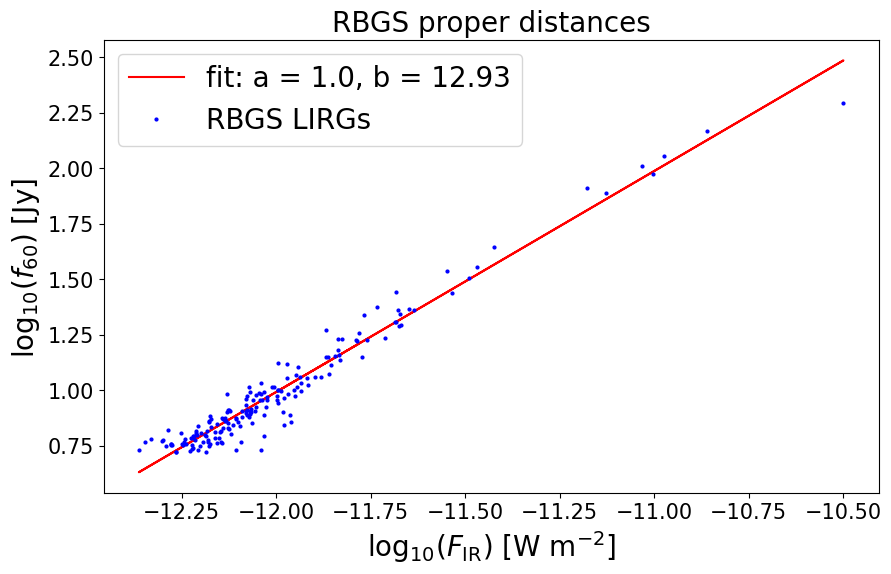

In [8]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.errorbar(np.log10(FIR),np.log10(f60), xerr= None, yerr = None, ls = "none",marker ='o', ms=2, label = 'RBGS LIRGs', color = 'blue')

plt.plot(np.log10(FIR), func(np.log10(FIR),popt[0],popt[1]), 
         label = 'fit: a = ' + str(round(popt[0],2)) + ', b = ' + str(round(popt[1],2)), color = 'red')

plt.xlabel('$\log_{10}(F_{\mathrm{IR}})$ [W m$^{-2}$]', fontsize= 20)
plt.ylabel('$\log_{10}(f_{60})$ [Jy] ',fontsize= 20)
plt.title('RBGS proper distances',fontsize = 20)
plt.legend(fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


This is the same fit but with the luminosity distance determined from $cz$ where $z$ is the redshift and $c$ is the speed of light. 

[0.01615326 0.19386746]


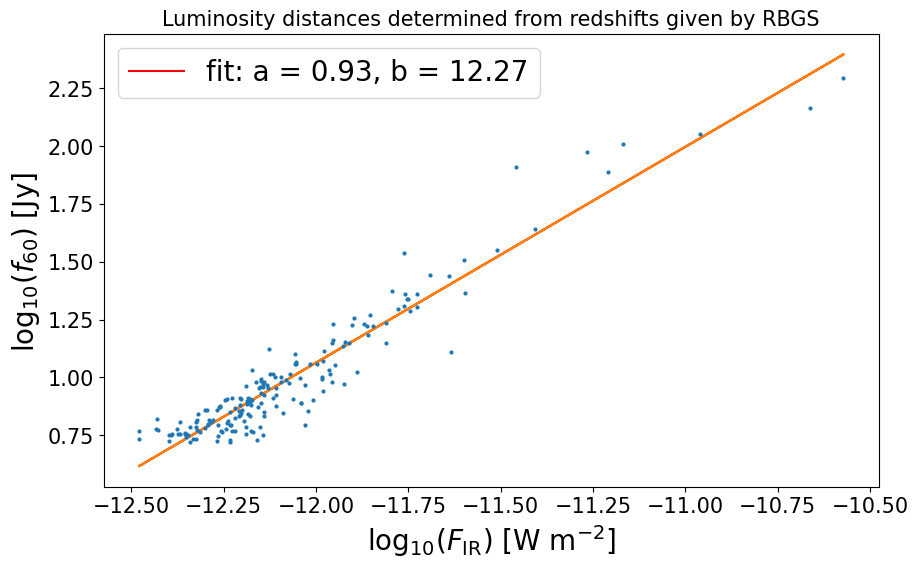

In [9]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.errorbar(np.log10(FIR_P18),np.log10(f60), xerr= None, yerr = None, ls = "none",marker ='o', ms=2)

plt.plot(np.log10(FIR_P18), func(np.log10(FIR_P18),popt_P18[0],popt_P18[1]), 
         label = 'fit: a = ' + str(round(popt_P18[0],2)) + ', b = ' + str(round(popt_P18[1],2)), color = 'red')
plt.plot(np.log10(FIR_P18), func(np.log10(FIR_P18),popt_P18[0],popt_P18[1]))

plt.xlabel('$\log_{10}(F_{\mathrm{IR}})$ [W m$^{-2}$]', fontsize= 20)
plt.ylabel('$\log_{10}(f_{60})$ [Jy] ',fontsize= 20)
plt.legend(fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Luminosity distances determined from redshifts given by RBGS',fontsize = 15)
print(np.sqrt(np.diag(pcov)))

The luminosity distance is calculated as:

$D_L = \sqrt{\frac{10^{-\Lambda}L_{\mathrm{IR}}}{4 \pi}}$

with $\Lambda = \frac{1}{a} \log_{10} \left(\frac{f_{60}}{\mathrm{Jy}}\right) -\frac{b}{a}$ 

In [10]:
def Complete(f60_i, LIR_i,a,b):
    f60_threshold = f60_i
    LIR_threshold = pow(10,LIR_i)*3.82e26
    expo = pow(a,-1)*np.log10(f60_threshold)-(b/a)
    dl = np.sqrt((pow(10,-expo)*LIR_threshold)/(4*np.pi))
    dl_Mpc = (dl*u.m).to(u.Mpc).value
    return [round(dl_Mpc,2),round(z_at_value(Planck18.luminosity_distance,dl_Mpc*u.Mpc),4)]


complete_z = Complete(5.24,11,popt_P18[0],popt_P18[1])[1]
complete_dl_pablo = Complete(1,12,0.9585, 12.645)[0] # consistency check
print('completeness ULIRGs Pablo:' ,complete_dl_pablo)

completeness ULIRGs Pablo: 705.21


In [11]:
print('Complete up to luminosity distance: ', Complete(5.24,11,popt_P18[0],popt_P18[1])[0] , " Mpc")
print('Complete up to proper distance: ', Complete(5.24,11,popt[0],popt[1])[0] , " Mpc")
print('Complete up to redshift (from luminosity distance): ', Complete(5.24,11,popt_P18[0],popt_P18[1])[1])

Complete up to luminosity distance:  86.38  Mpc
Complete up to proper distance:  77.36  Mpc
Complete up to redshift (from luminosity distance):  0.0192


In [12]:
complete_DL = Complete(5.24,11,popt_P18[0],popt_P18[1])[0]

# LIRG selection bias 

In [13]:
threshold_fluxes = np.logspace(-0.5,2.3,num=60,base=10) # 

numbers_above_threshold = np.array([])

for threshold_flux in threshold_fluxes:
    number_above_threshold = 0
    for flux_60_micron, log_lum_IR in zip(f60,luminosity):
        if flux_60_micron > threshold_flux and log_lum_IR >= 11:
            number_above_threshold += 1
    numbers_above_threshold = np.append(numbers_above_threshold,number_above_threshold)
    
unc_numbers_above_threshold = np.sqrt(numbers_above_threshold)

In [14]:
def fit_func(x,a,b):
    return a*x + b
print(max(f60))
indices = np.where( (threshold_fluxes >= 5.24) & (threshold_fluxes <130))

threshold_fluxes_fit            = threshold_fluxes[indices]
numbers_above_threshold_fit     = numbers_above_threshold[indices]
unc_numbers_above_threshold_fit = unc_numbers_above_threshold[indices]

sigma_log = np.log10(numbers_above_threshold_fit) - np.log10(numbers_above_threshold_fit - unc_numbers_above_threshold_fit)
par, cov = curve_fit(fit_func,np.log10(threshold_fluxes_fit),np.log10(numbers_above_threshold_fit),sigma=sigma_log)

196.37


Condsider a generic standard-candle source population with characteristic luminosity $L_0$ and a uniform space density that does not evolve with redshift. Then the total number of sources within a certain luminosity distance $d^{\mathrm{thresh}}_L$ is therefrore given as

$N = \frac{4 \pi n}{3}(d^{\mathrm{thresh}}_L)^3$ (1).

If we now define e flux threshold 

$f_{60} = \frac{L_0}{4\pi (d^{\mathrm{thresh}}_L)^2}$ (2),

then our assumptions imply that the number of sources with a flux larger than this threshold
is equal to the number of sources within the corresponding threshold distance, $N(f_{60} > f^{\mathrm{thresh}}_{60})$. Thus, by combining Equations (1) and (2) we find the power-law relation

$N(f_{60} > f^{\mathrm{thresh}}_{60}) \propto (f^{\mathrm{thresh}}_{60})^{-\frac{3}{2}} $.

An unbiased selection of homogeneous, standard-candle sources is therefore expected
to be compatible with this dependency. 

The RBGS LIRGs are contained with $z$ = ... and therefore the redshift effects are expected to be negligible. In addition, the RBGS LIRG have $\log_{10}(L_{\mathrm{IR}}/L_{\odot}) \in [12,13]$. Therefore, we can approximate the LIRG source class as a homogeneous standard-candle population within $z = 0.054$.

-1.48521 +- 0.04108


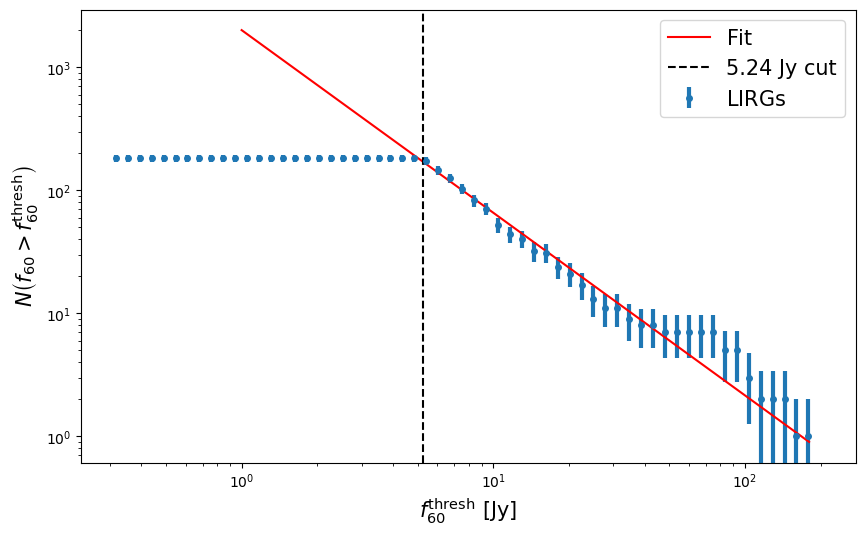

In [15]:
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.errorbar(threshold_fluxes,
            numbers_above_threshold,
            yerr=unc_numbers_above_threshold,
            marker='.',
            markersize=8,
            linestyle='none',
            linewidth=3,
            capsize=0,
            label=r"$\mathrm{LIRGs}$")

x_range = np.linspace(1,180,100)

plt.plot(x_range,np.power(10,fit_func(np.log10(x_range),par[0],par[1])),color="r",label=r"$\mathrm{Fit}$")

plt.axvline(x = 5.24, color = 'black', linestyle = 'dashed', label = '5.24 Jy cut')
plt.xlabel(r'$f_{60}^{\mathrm{thresh}}~ [\mathrm{Jy}]$', fontsize = 15)
plt.ylabel(r'$N \left( f_{60} > f_{60}^{\mathrm{thresh}} \right)$', fontsize= 15)
plt.legend(fontsize = 15)
plt.xscale('log')
plt.yscale('log')
print(round(par[0],5) , "+-", round(np.sqrt(np.diag(cov))[0],5))


$\textbf{Conclusion}$: The fit parameter is indeed consistent with the expected -3/2 slope.